In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
dataset=pd.read_csv("train.csv")

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Column selection/Field Selection

<AxesSubplot:xlabel='Sex', ylabel='count'>

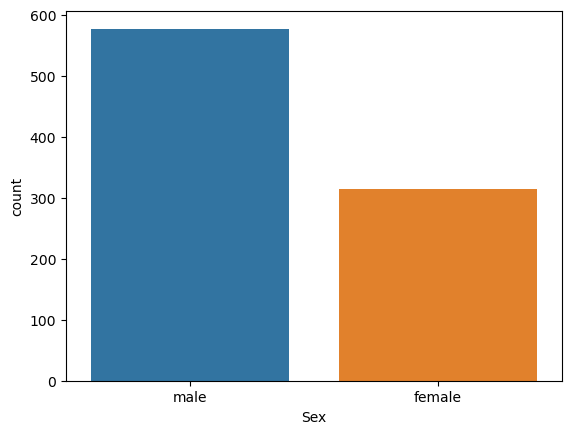

In [5]:
#cheak which columns affect on final output
#column=>sex
sns.countplot(data=dataset,x='Sex')

<AxesSubplot:xlabel='Sex', ylabel='count'>

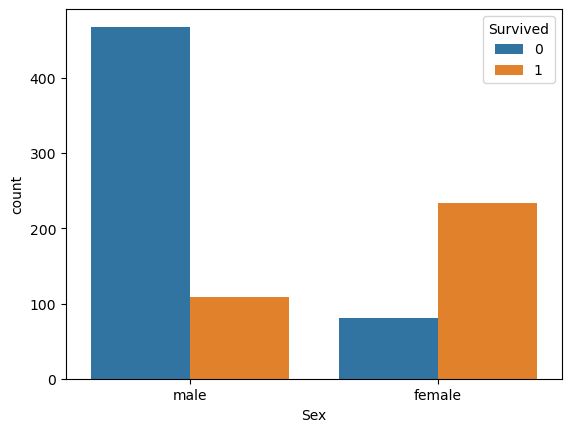

In [6]:
sns.countplot(data=dataset,x='Sex',hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

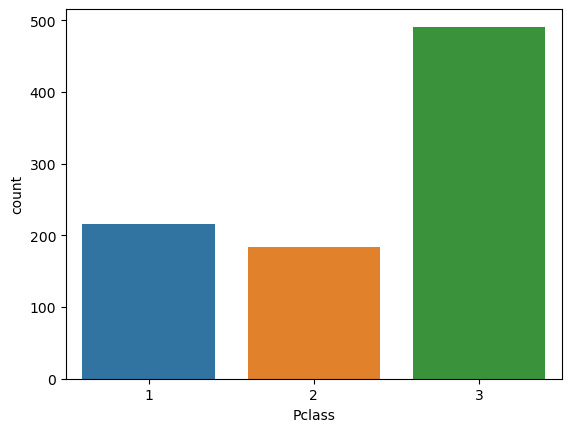

In [7]:
#Column=>Pclass
sns.countplot(data=dataset,x='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

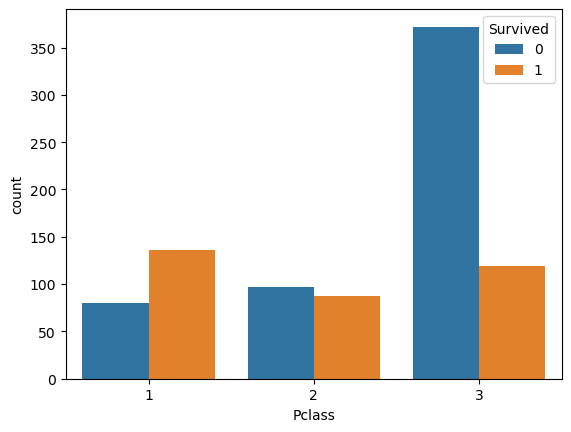

In [8]:
sns.countplot(data=dataset,x='Pclass',hue='Survived')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

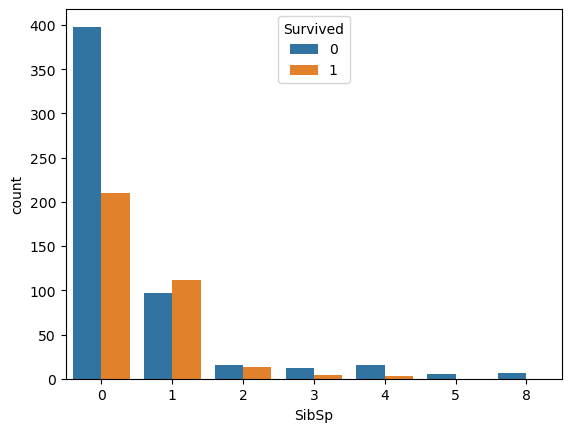

In [9]:
#column=>SibSp
sns.countplot(data=dataset,x='SibSp',hue='Survived')

<AxesSubplot:xlabel='Parch', ylabel='count'>

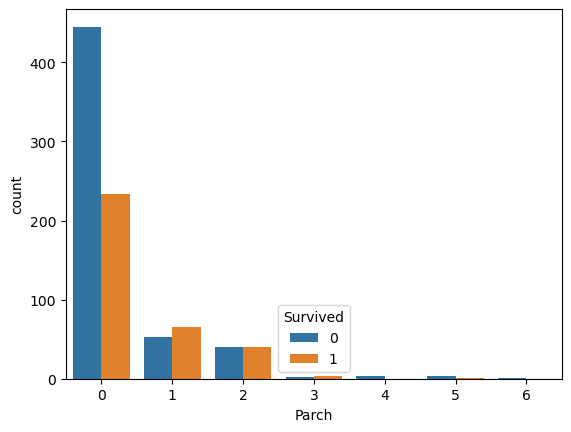

In [10]:
sns.countplot(data=dataset,x='Parch',hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

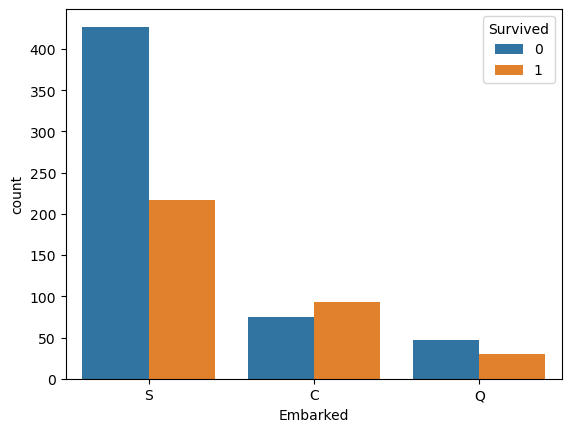

In [11]:
sns.countplot(data=dataset,x='Embarked',hue='Survived')

In [12]:
dataset.drop("PassengerId",axis=1,inplace=True) #drop passengerid
dataset.drop("Name",axis=1,inplace=True) #drop Name
dataset.drop("Ticket",axis=1,inplace=True) #drop Ticket
dataset.drop("Fare",axis=1,inplace=True) #drop Fare
dataset.drop("Parch",axis=1,inplace=True) #drop parch
dataset.drop("Cabin",axis=1,inplace=True) #drop Cabin

In [13]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,male,22.0,1,S
1,1,1,female,38.0,1,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,1,S
4,0,3,male,35.0,0,S


# Data Imputation:
Data imputation is a method for retaining the majority of the dataset's data and information by substituting missing data

In [14]:
#finding Null Values:
dataset.isnull()

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
886,False,False,False,False,False,False
887,False,False,False,False,False,False
888,False,False,False,True,False,False
889,False,False,False,False,False,False


<AxesSubplot:>

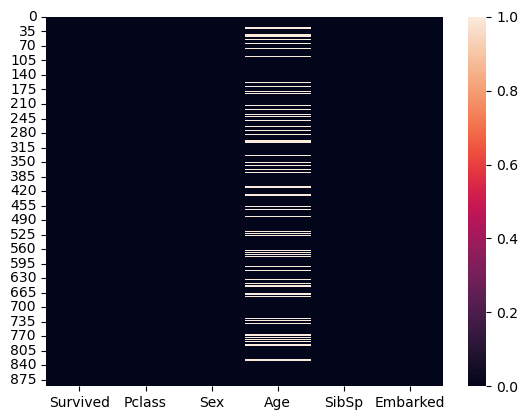

In [15]:
sns.heatmap(dataset.isnull())

<AxesSubplot:>

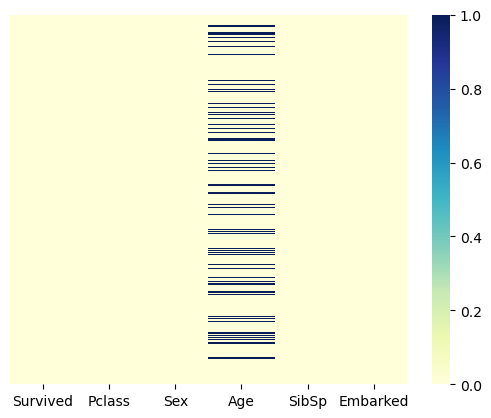

In [16]:
sns.heatmap(dataset.isnull() ,yticklabels=False , cmap="YlGnBu")

here we find out that in age column null value is present

now we have to feel it with real value


In [17]:
#here we find out the mean value using the perticular pclass
for i in range(1,4):
    age=int(dataset[dataset["Pclass"]==i]['Age'].dropna().mean())
    print(age)

38
29
25


In [18]:
dataset[['Pclass','Age']].head()

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0


In [20]:
def set_age(row):
    Pclass=row[0]
    age=row[1]
    if np.isnan(age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 25
    else:
        return age

In [21]:
dataset[['Pclass','Age']].apply(set_age)


Pclass     1.0
Age       38.0
dtype: float64

In [22]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,male,22.0,1,S
1,1,1,female,38.0,1,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,1,S
4,0,3,male,35.0,0,S


In [23]:
dataset[['Pclass','Age']].apply(set_age,axis=1)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Length: 891, dtype: float64

# Working on Catagorical variable:

In [25]:
#Create Dummy Variable
dataset.head()


,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,male,22.0,1,S
1,1,1,female,38.0,1,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,1,S
4,0,3,male,35.0,0,S


In [26]:
Pclass=pd.get_dummies(dataset['Pclass'],drop_first=True)
Pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [27]:
Sex=pd.get_dummies(dataset['Sex'],drop_first=True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [28]:
SibSp=pd.get_dummies(dataset['SibSp'],drop_first=True)
SibSp.head()

,1,2,3,4,5,8
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,0


In [29]:
Embarked=pd.get_dummies(dataset['Embarked'],drop_first=True)
Embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [30]:
#we have to drop catagorical variable
dataset.drop("Pclass",axis=1,inplace=True)
dataset.drop("Sex",axis=1,inplace=True)
dataset.drop("SibSp",axis=1,inplace=True)
dataset.drop("Embarked",axis=1,inplace=True)

In [31]:
dataset.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [32]:
y=dataset[['Survived']]
dataset.drop("Survived",axis=1,inplace=True)

In [33]:
#use that variable that we have converted into dummy variable 
dataset=pd.concat([Pclass,Sex,SibSp,Embarked] , axis=1)
dataset.head()
#Here axis=1 means Column and axis=0 means Row

,2,3,male,1,2,3,4,5,8,Q,S
0,0,1,1,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0,0,0,0,1


In [34]:
#now your data is ready to aply moddel on it
x=dataset
x.head()

,2,3,male,1,2,3,4,5,8,Q,S
0,0,1,1,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0,0,0,0,1


In [35]:
#parameter(column) = feature
#in some version of python feature name should be string
x.columns=x.columns.astype(str) 
x.columns

Index(['2', '3', 'male', '1', '2', '3', '4', '5', '8', 'Q', 'S'], dtype='object')

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split( x, y, test_size=0.20, random_state=20)

In [39]:
model=LogisticRegression()

In [40]:
model.fit(x_train,y_train)

C:\Mechanical\python anconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [41]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

In [42]:
model.coef_

array([[-0.6031187 , -1.77838673, -2.40500204,  0.22371853,  0.39930604,
        -0.8468231 , -0.04578966, -0.54224242, -0.80915974,  0.07159414,
        -0.41349022]])

In [43]:
model.intercept_

array([2.25760479])

In [44]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [50]:
y_test

,Survived
347,1
674,0
791,0
836,0
56,1
...,...
694,0
428,0
431,1
563,0


In [46]:
#confusion matrix
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test,y_pred)

array([[102,  10],
       [ 18,  49]], dtype=int64)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8435754189944135
